#Machine Learning Model for Acne Detection


Step1: Import necessary libraries: First, I import the required libraries. Tensorflow is a popular deep learning library, and Keras is a high-level neural networks API that runs on top of TensorFlow. I also import other libraries like ImageDataGenerator, matplotlib.pyplot, and os.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

Step2: Mount Google Drive: Mount Google Drive to access the dataset files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step3: Set the path for the dataset: Define the path for the training, validation, and test datasets.

And

Step4: Set the image dimensions and batch size: Set the image dimensions to 224x224 and the batch size to 32. The image dimensions are important because the Convolutional Neural Network (CNN) layers require the input images to have the same dimensions.


In [ ]:
train_data_dir = '/content/drive/My Drive/acne_dataset'
validation_data_dir = '/content/drive/My Drive/acne_dataset'
test_data_dir = '/content/drive/My Drive/acne_dataset'


img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')


Found 502 images belonging to 3 classes.
Found 502 images belonging to 3 classes.
Found 502 images belonging to 3 classes.



Step5: Define the CNN model: We create a sequential model using the Keras Sequential API. The model has three convolutional layers with max-pooling layers in between, followed by a flatten layer and two fully connected layers. The final output layer has a sigmoid activation function because we are doing binary classification.

In [ ]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Step6: Compile the model: Compile the model by specifying the loss function, optimizer, and evaluation metric. Use the binary_crossentropy loss function because it is suitable for binary classification problems. Use the RMSprop optimizer and accuracy metric.

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


Step7: Train the model: Train the model using the fit method of the model object. Pass the training and validation generators, the number of steps per epoch, the number of epochs, and the validation steps.

In [ ]:
# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size)


Epoch 1/50
15/15 [==============================] - 177s 12s/step - loss: 1.0804 - accuracy: 0.5043 - val_loss: 0.5393 - val_accuracy: 0.5063
Epoch 2/50
15/15 [==============================] - 78s 5s/step - loss: 0.4872 - accuracy: 0.5085 - val_loss: 0.3586 - val_accuracy: 0.5021
Epoch 3/50
15/15 [==============================] - 74s 5s/step - loss: 0.3724 - accuracy: 0.5085 - val_loss: 0.6371 - val_accuracy: 0.5000
Epoch 4/50
15/15 [==============================] - 81s 5s/step - loss: 0.3984 - accuracy: 0.5021 - val_loss: 0.4482 - val_accuracy: 0.5000
Epoch 5/50
15/15 [==============================] - 79s 5s/step - loss: 0.4345 - accuracy: 0.4957 - val_loss: 0.3373 - val_accuracy: 0.5146
Epoch 6/50
15/15 [==============================] - 81s 5s/step - loss: 0.4058 - accuracy: 0.5021 - val_loss: 0.3617 - val_accuracy: 0.4979
Epoch 7/50
15/15 [==============================] - 79s 5s/step - loss: 0.3903 - accuracy: 0.5064 - val_loss: 0.3652 - val_accuracy: 0.5042
Epoch 8/50
15/15 [

Step8: Evaluate the model: Evaluate the model on the test dataset using the evaluate method of the model object. Print the test loss and accuracy.

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

15/15 [==============================] - 17s 1s/step - loss: 0.2760 - accuracy: 0.5083
Test loss: 0.27604350447654724
Test accuracy: 0.5083333253860474


Make predictions: Use the uploaded image to make a prediction on whether it contains acne or not. Use OpenCV library to read and resize the uploaded image. Preprocess the image by scaling its pixel values and expanding its dimensions. Then use the predict method of the model object to make a prediction. Finally, print the prediction result.

In [ ]:
# Allow user to upload an image to test the model's prediction
from google.colab import files

uploaded = files.upload()

Saving face1.jpg to face1.jpg


In [ ]:
# Make predictions on a test image uploaded by the user
import numpy as np
import cv2


Saving face5.jpg to face5.jpg


In [ ]:
# Load the uploaded image
for filename in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded['face1.jpg'], np.uint8), cv2.IMREAD_UNCHANGED)

# Preprocess the input image
img = cv2.resize(img, (img_width, img_height))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

In [ ]:
# Predict acne on the input image
prediction = model.predict(img)

# Display the prediction result
if prediction[0][0] >= 0.5:
    print('Acne detected in the input image.')
else:
    print('No acne detected in the input image.')

1/1 [==============================] - 0s 49ms/step
Acne detected in the input image.


In [ ]:
import numpy as np
import cv2
from google.colab import files

uploaded = files.upload()




Saving face8.jpg to face8.jpg


In [ ]:
print(uploaded.keys())


dict_keys(['face8.jpg'])


In [ ]:
# Load the uploaded image
for filename in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded['face8.jpg'], np.uint8), cv2.IMREAD_UNCHANGED)

# Preprocess the input image
img_resized = cv2.resize(img, (img_width, img_height))
img_preprocessed = img_resized.astype('float32') / 255.0
img_input = np.expand_dims(img_preprocessed, axis=0)



1/1 [==============================] - 0s 51ms/step


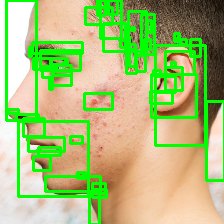

In [ ]:
# Predict acne on the input image
prediction = model.predict(img_input)

# Draw bounding boxes around the acne
if prediction[0][0] >= 0.5:
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    contours, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(img_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the input image with detected acne
from google.colab.patches import cv2_imshow
cv2_imshow(img_resized)

cv2.waitKey(0)
cv2.destroyAllWindows()